In [32]:
import torch


In [33]:
words = open('Data\\names.txt', 'r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [34]:
# build the vocabulary of characters and mappings to/from integers
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
#makking changes
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [35]:
# build the dataset

block_size = 3 # context length: how many characters do we take to predict the next one?

def build_dataset(words):  
  X, Y = [], []
  for w in words:

    #print(w)
    context = [0] * block_size
    for ch in w + '.':
      ix = stoi[ch]
      X.append(context)
      Y.append(ix)
      #print(''.join(itos[i] for i in context), '--->', itos[ix])
      context = context[1:] + [ix] # crop and append

  X = torch.tensor(X)
  Y = torch.tensor(Y)
  print(X.shape, Y.shape)
  return X, Y



In [66]:
import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xtest, Ytest = build_dataset(words[n2:])

torch.Size([182625, 3]) torch.Size([182625])
torch.Size([22655, 3]) torch.Size([22655])
torch.Size([22866, 3]) torch.Size([22866])


In [101]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn(27,10, generator=g)
W1 = torch.randn(30,200, generator=g)
b1=torch.randn(200, generator=g)
W2 = torch.randn(200, 27, generator=g)
b2 = torch.randn(27, generator=g)
parameters = [W1, b1, W2, b2, C]

for p in parameters:
    p.requires_grad= True


In [111]:
l = []
for p in parameters:
    l.append(p.nelement())
sum(l)

TypeError: 'NoneType' object is not callable

In [95]:

stepi = []
lossi= []
def training_loop(parameters, X, Y):
   learning_rate = 0.01
    
   for i in range(30000):
        mini_batch = torch.randint(0, X.shape[0], (32,))
        Xbatch = X[mini_batch]
        Ybatch = Y[mini_batch]
        
        W1, b1, W2, b2, C = parameters

        # Zero the gradients
        for p in parameters:
            if p.grad is not None:
                p.grad.zero_()

        # Forward pass
        emb = C[Xbatch]
        h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
        logits = h @ W2 + b2
        loss = torch.nn.functional.cross_entropy(logits, Ybatch)

        # Backward pass
        loss.backward()

        # Update parameters
        for p in parameters:
            p.data -= learning_rate * p.grad
        stepi.append(i)
        lossi.append(loss.item())

        # Print loss every iteration
   print(loss.item())

# Assuming build_dataset and words are defined elsewhere
# X, Y = build_dataset(words)
training_loop(parameters, Xtr, Ytr)

2.193512439727783


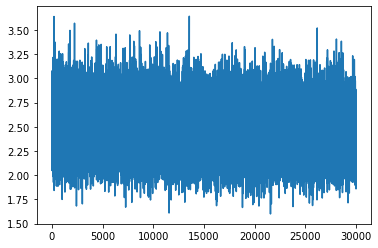

In [90]:
import matplotlib.pyplot as plt
plt.plot(stepi, lossi)

In [96]:
# Forward pass
emb = C[Xtr]
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
logits = h @ W2 + b2
loss = torch.nn.functional.cross_entropy(logits, Ytr)
loss

tensor(2.2398, grad_fn=<NllLossBackward0>)

In [97]:
# Forward pass
emb = C[Xdev]
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
logits = h @ W2 + b2
loss = torch.nn.functional.cross_entropy(logits, Ydev)
loss

tensor(2.2504, grad_fn=<NllLossBackward0>)

In [110]:
sum=None

# Again Review

In [5]:
import torch
words = open('Data\\names.txt', 'r').read().splitlines()
# words[:8]
# build the vocabulary of characters and mappings to/from integers
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
print(itos)

block_size = 3 # context length: how many characters do we take to predict the next one?
X, Y = [], []
for w in words[:3]:
  
  #print(w)
  context = [0] * block_size
  for ch in w + '.':
    ix = stoi[ch]
    X.append(context)
    Y.append(ix)
    #print(''.join(itos[i] for i in context), '--->', itos[ix])
    context = context[1:] + [ix] # crop and append
  
X = torch.tensor(X)
Y = torch.tensor(Y)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [25]:
torch.manual_seed(42)
C = torch.randn((27, 2))
x = torch.tensor([[4,3],[1,2]])
print(x)
print( C[x])
print(C)

tensor([[4, 3],
        [1, 2]])
tensor([[[-0.7521,  1.6487],
         [-0.0431, -1.6047]],

        [[ 0.9007, -2.1055],
         [ 0.6784, -1.2345]]])
tensor([[ 1.9269,  1.4873],
        [ 0.9007, -2.1055],
        [ 0.6784, -1.2345],
        [-0.0431, -1.6047],
        [-0.7521,  1.6487],
        [-0.3925, -1.4036],
        [-0.7279, -0.5594],
        [-0.7688,  0.7624],
        [ 1.6423, -0.1596],
        [-0.4974,  0.4396],
        [-0.7581,  1.0783],
        [ 0.8008,  1.6806],
        [ 1.2791,  1.2964],
        [ 0.6105,  1.3347],
        [-0.2316,  0.0418],
        [-0.2516,  0.8599],
        [-1.3847, -0.8712],
        [-0.2234,  1.7174],
        [ 0.3189, -0.4245],
        [-0.8140, -0.7360],
        [-0.8371, -0.9224],
        [ 1.8113,  0.1606],
        [ 0.3672,  0.1754],
        [-1.1845,  1.3835],
        [-1.2024,  0.7078],
        [-1.0759,  0.5357],
        [ 1.1754,  0.5612]])


In [33]:
C[X].shape

torch.Size([16, 3, 2])

In [49]:
emb = C[X]
emb[[[0,15]]]

tensor([[[ 1.9269,  1.4873],
         [ 1.9269,  1.4873],
         [ 1.9269,  1.4873]],

        [[ 0.9007, -2.1055],
         [ 0.3672,  0.1754],
         [ 0.9007, -2.1055]]])

In [60]:
C = torch.tensor([
    [1, 2],
    [3, 4],
    [5, 6],
    [7, 8],
    [9, 10],
    [11, 12],
    [13, 14],
    [15, 16],
    [17, 18],
    [19, 20],
    [21, 22],
    [23, 24],
    [25, 26],
    [27, 28],
    [29, 30],
    [31, 32],
    [33, 34],
    [35, 36],
    [37, 38],
    [39, 40],
    [41, 42],
    [43, 44],
    [45, 46],
    [47, 48],
    [49, 50],
    [51, 52],
    [53, 54]
])

In [70]:
emb

tensor([[[ 1,  2],
         [ 1,  2],
         [ 1,  2]],

        [[ 1,  2],
         [ 1,  2],
         [11, 12]],

        [[ 1,  2],
         [11, 12],
         [27, 28]],

        [[11, 12],
         [27, 28],
         [27, 28]],

        [[27, 28],
         [27, 28],
         [ 3,  4]],

        [[ 1,  2],
         [ 1,  2],
         [ 1,  2]],

        [[ 1,  2],
         [ 1,  2],
         [31, 32]],

        [[ 1,  2],
         [31, 32],
         [25, 26]],

        [[31, 32],
         [25, 26],
         [19, 20]],

        [[25, 26],
         [19, 20],
         [45, 46]],

        [[19, 20],
         [45, 46],
         [19, 20]],

        [[45, 46],
         [19, 20],
         [ 3,  4]],

        [[ 1,  2],
         [ 1,  2],
         [ 1,  2]],

        [[ 1,  2],
         [ 1,  2],
         [ 3,  4]],

        [[ 1,  2],
         [ 3,  4],
         [45, 46]],

        [[ 3,  4],
         [45, 46],
         [ 3,  4]]])

In [74]:
emb =C[X]
emb[[0,14,15],[1]]

tensor([[ 1,  2],
        [ 3,  4],
        [45, 46]])